1. What is the value of $\$1$ received at the end of each of the next $8$ years? Use this script to begin the modeling process. Describe each calculation.

In [13]:
rates <- c(0.06, 0.07, 0.05, 0.09, 0.09, 0.08, 0.08, 0.08)
t <- seq(1, 8)
(pv.1 <- sum(10/(1 + rates)^t))

[1] 57.92958

In [12]:
salvage <- 5
(pv.salvage <- (salvage/(1 + rates[8])^8))

[1] 2.701344

In [14]:
cashflow <- rep(10, 8)
cashflow[8] <- cashflow[8] + salvage
(pv.machine <- sum(cashflow/(1 + rates)^t))

[1] 60.63092

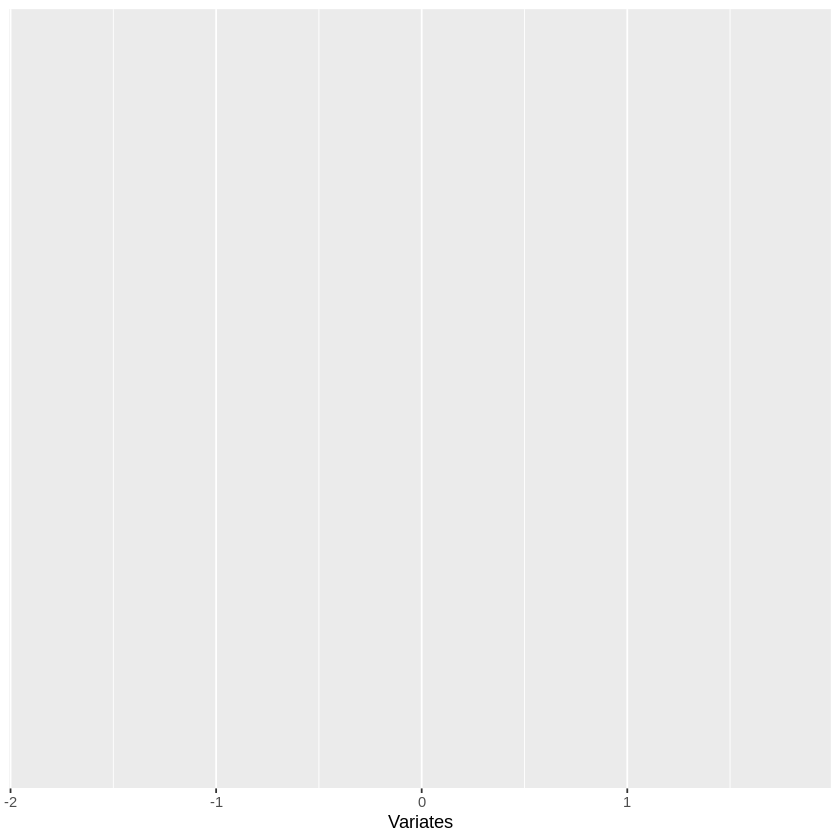

In [2]:
library(ggplot2)
set.seed(1016)
n.sim <- 10
x <- rnorm(n.sim)
y <- x/(rchisq(x^2, df = 3))^0.5
z <- c(x, y)
indicator <- rep(c("normal", "abnormal"),
                each = length(x))
xy.df <- data.frame(Variates = z, Distributions = indicator)
ggplot(xy.df, aes(x = Variates, fill = Distributions))

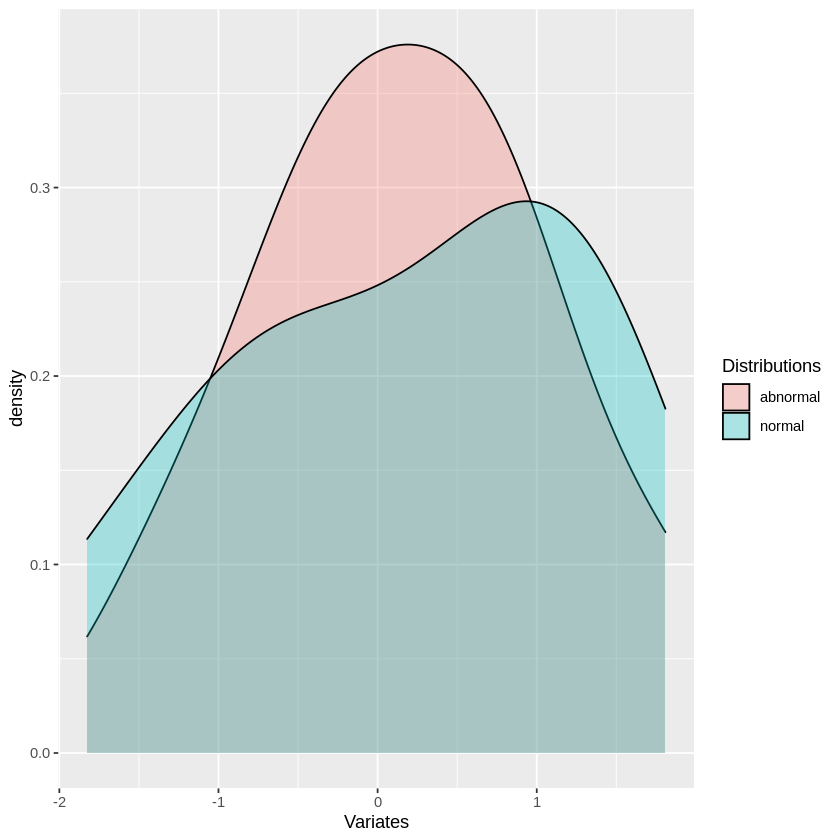

In [4]:
ggplot(xy.df, aes(x = Variates, fill = Distributions)) + geom_density(alpha = 0.3)

Warning message:
“Removed 3 rows containing non-finite values (stat_density).”


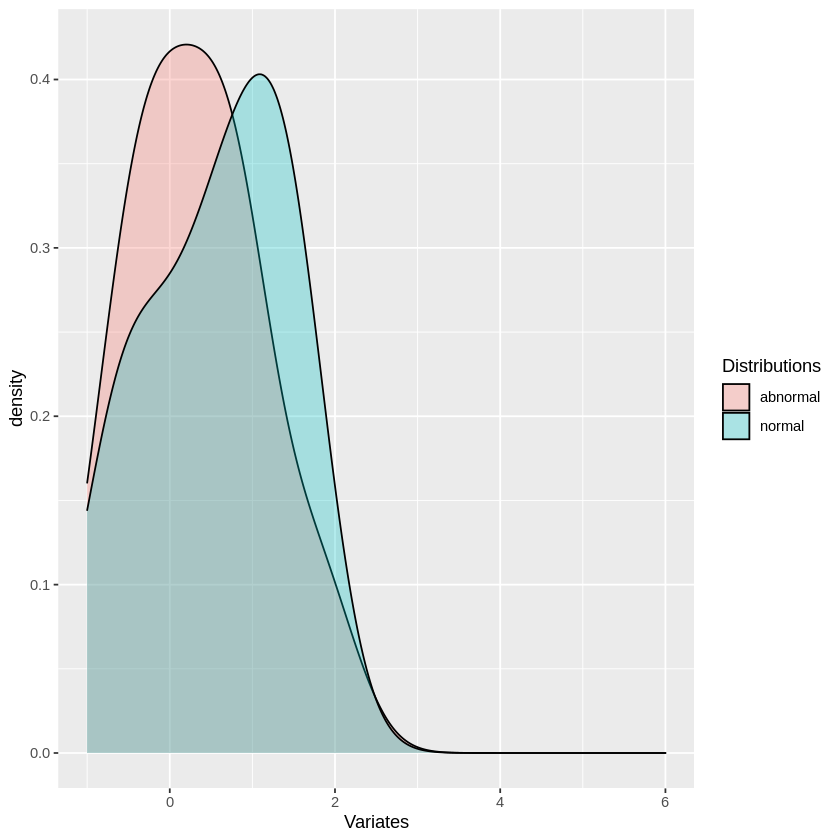

In [5]:
ggplot(xy.df, aes(x = Variates, fill = Distributions)) + geom_density(alpha = 0.3) + xlim(-1, 6)

In [17]:
(A <- matrix(1:12, ncol = 4))

1,4,7,10
2,5,8,11
3,6,9,12


In [19]:
(A.col <- matrix(1:12, ncol = 4, byrow = FALSE))

1,4,7,10
2,5,8,11
3,6,9,12


In [20]:
(R <- rbind(1:4, 5:8, 9:12))

1,2,3,4
5,6,7,8
9,10,11,12


In [21]:
(C <- cbind(1:3, 4:6, 7:9, 10:12))

1,4,7,10
2,5,8,11
3,6,9,12


In [22]:
A.col == C

TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE


In [24]:
(A.min <- outer(3:6/4, 3:6/4, 3:6/4, FUN = pmin))

0.75,0.75,0.75,0.75
0.75,1.00,1.00,1.00
0.75,1.00,1.25,1.25
0.75,1.00,1.25,1.50


In [26]:
(A.max <- outer(3:6/4, 3:6/4, FUN = pmax))

0.75,1.00,1.25,1.5
1.00,1.00,1.25,1.5
1.25,1.25,1.25,1.5
1.50,1.50,1.50,1.5


In [27]:
(A.sym <- A.max - A.min - 0.5)

-0.50,-0.25,0.00,0.25
-0.25,-0.50,-0.25,0.00
0.00,-0.25,-0.50,-0.25
0.25,0.00,-0.25,-0.50


In [28]:
diag(A.sym) <- 1
A.sym

1.00,-0.25,0.00,0.25
-0.25,1.00,-0.25,0.00
0.00,-0.25,1.00,-0.25
0.25,0.00,-0.25,1.00


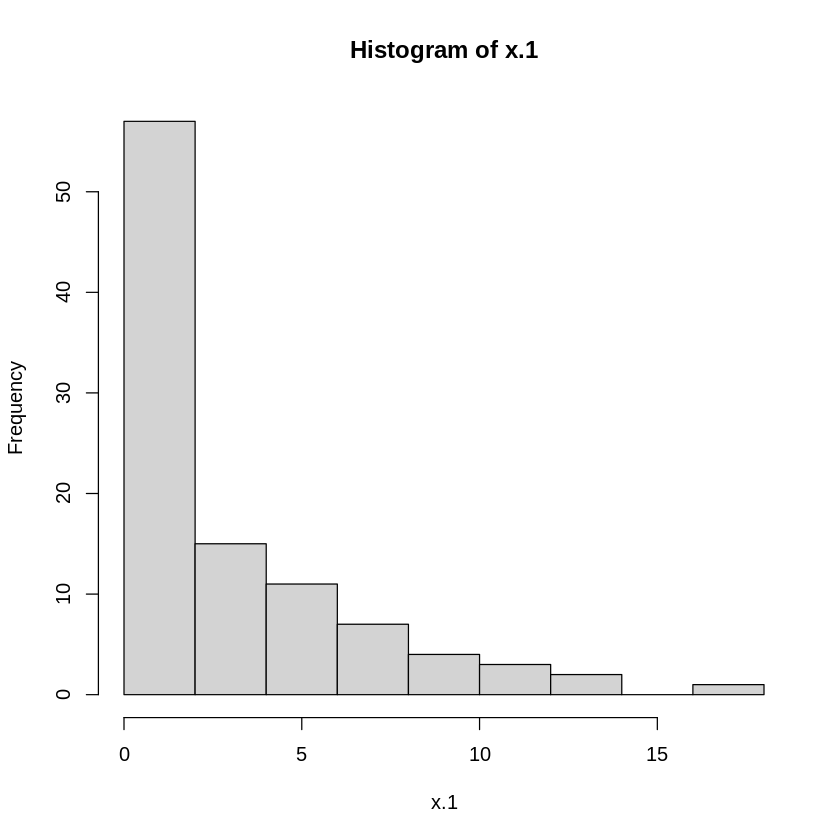

In [29]:
n.sim <- 100
x.1 <- rgamma(n.sim, 0.5, 0.2)
x.2 <- rlnorm(n.sim, 0.15, 0.25)
hist(x.1)

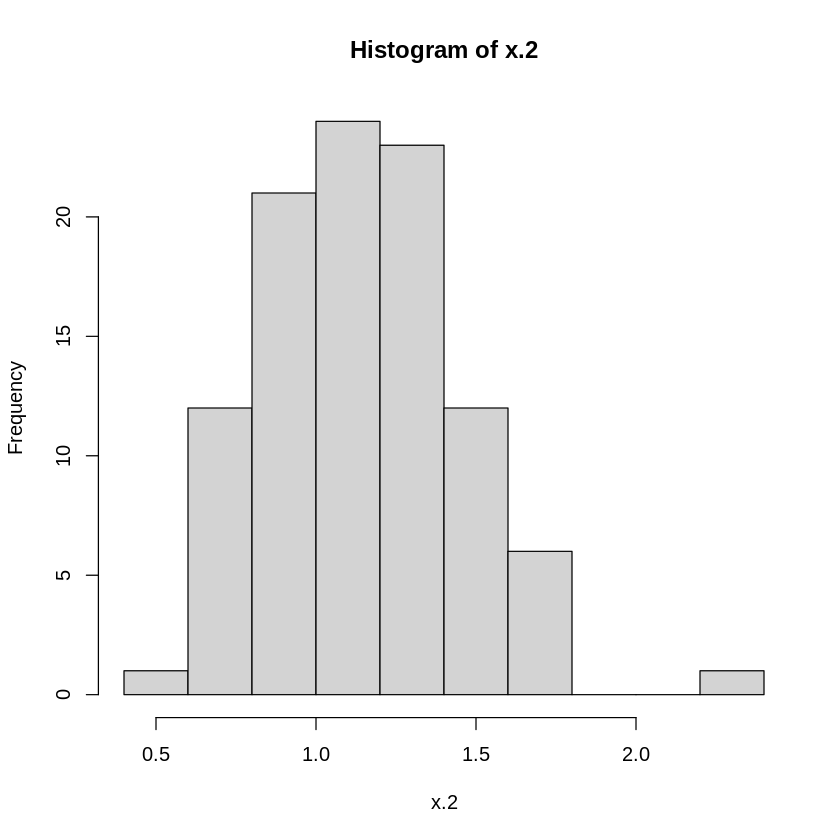

In [30]:
hist(x.2)

In [33]:
X <- cbind(x.1, x.2)

In [36]:
y <- 1.5 * x.1 + 0.8 * x.2 + rnorm(n.sim, 4.2, 5.03)

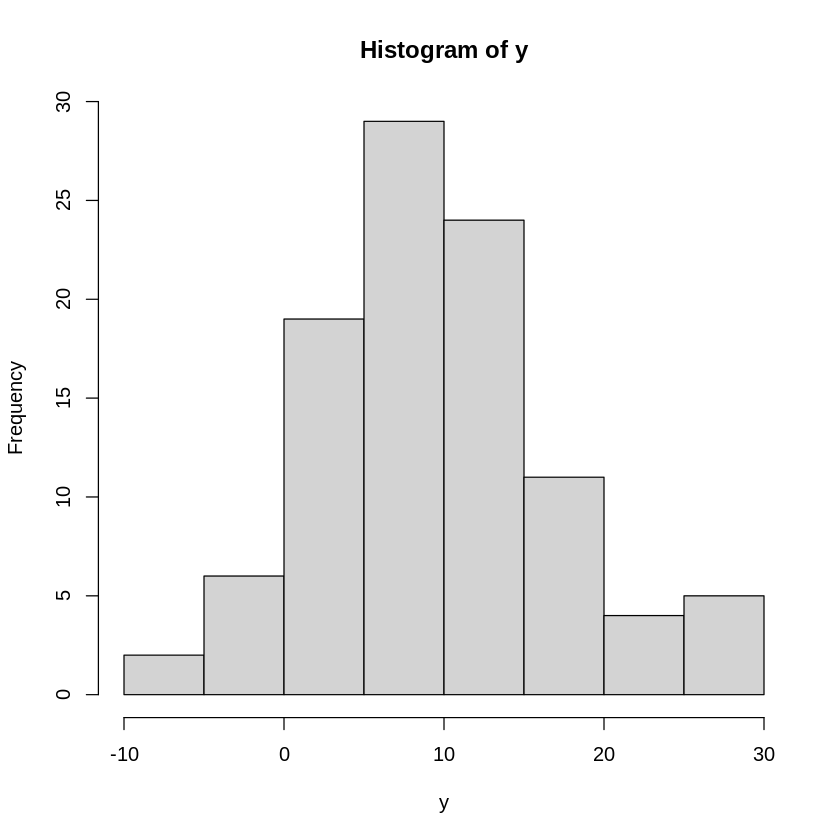

In [37]:
hist(y)

In [38]:
X <- cbind(x.1, x.2)
XTX.inverse <- solve(t(X) %*% X)
(beta.hat <- XTX.inverse %*% t(X) %*% y)

x.1,1.607142
x.2,4.041624


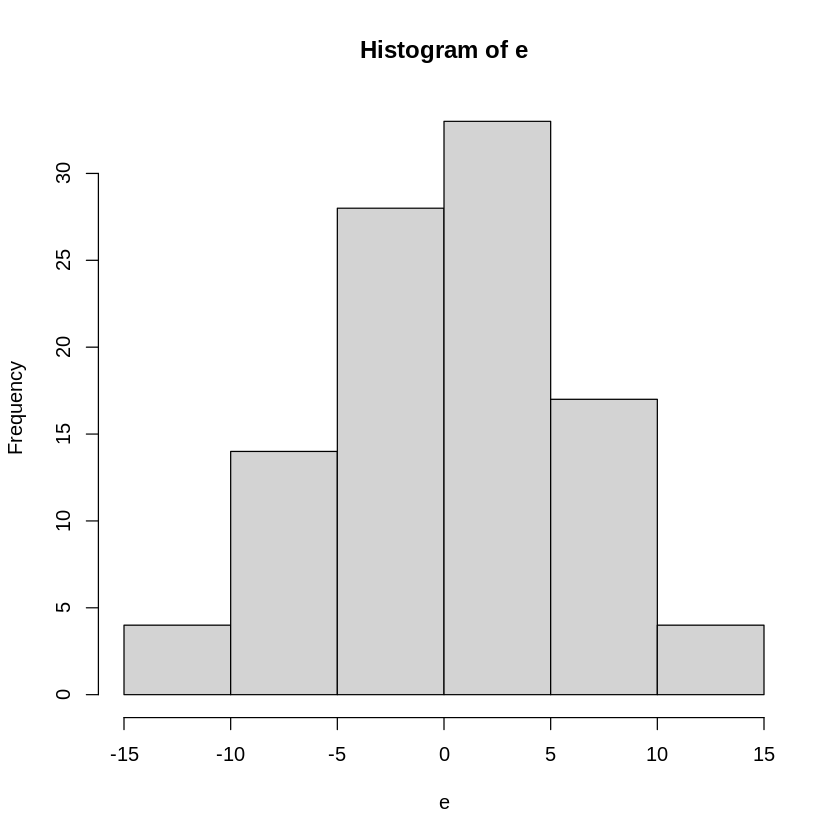

In [40]:
e <- y - X %*% beta.hat
hist(e)

### 2.4.2 More about residuals page 36